In [3]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import os.path as op

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

In [6]:
files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("results")) for f in fn]
results_files = [f for f in files if ".csv" in f]

In [7]:
tmp = []
for f in results_files:
    df_tmp = pd.read_csv(f)
    tmp.append(df_tmp)

In [8]:
df_concat = pd.concat(tmp)

In [9]:
df_concat['dataset'].value_counts()

dataset
natural      972
synthetic    972
Name: count, dtype: int64

/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed i

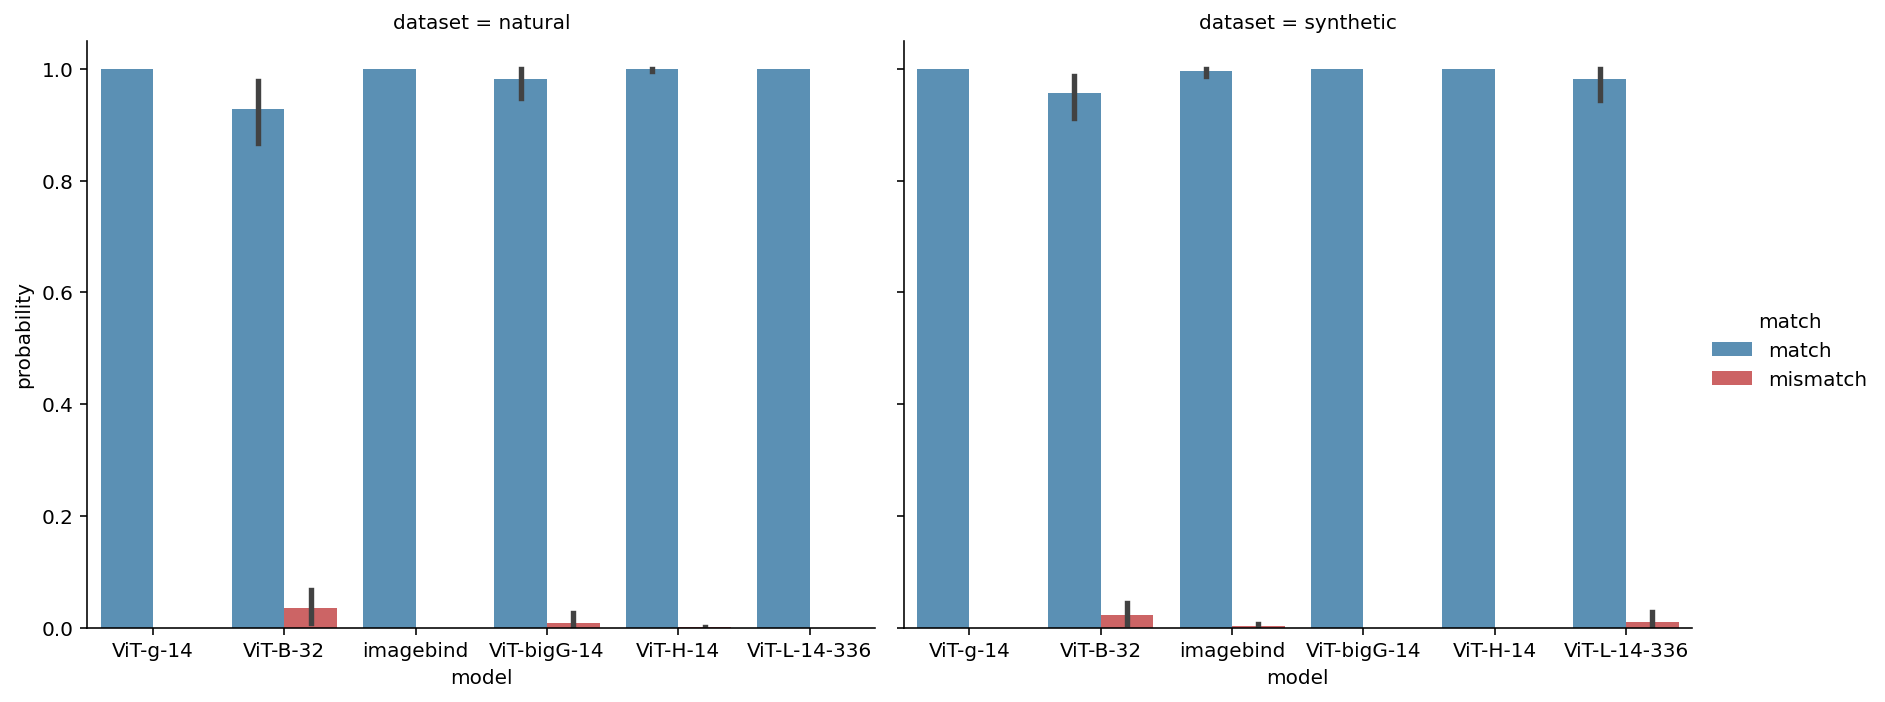

In [10]:
sns.catplot(data = df_concat,
            x = "model",
            y = "probability",
            hue = "match",
            col = "dataset",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C3'],
            alpha= 0.8)

/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed i

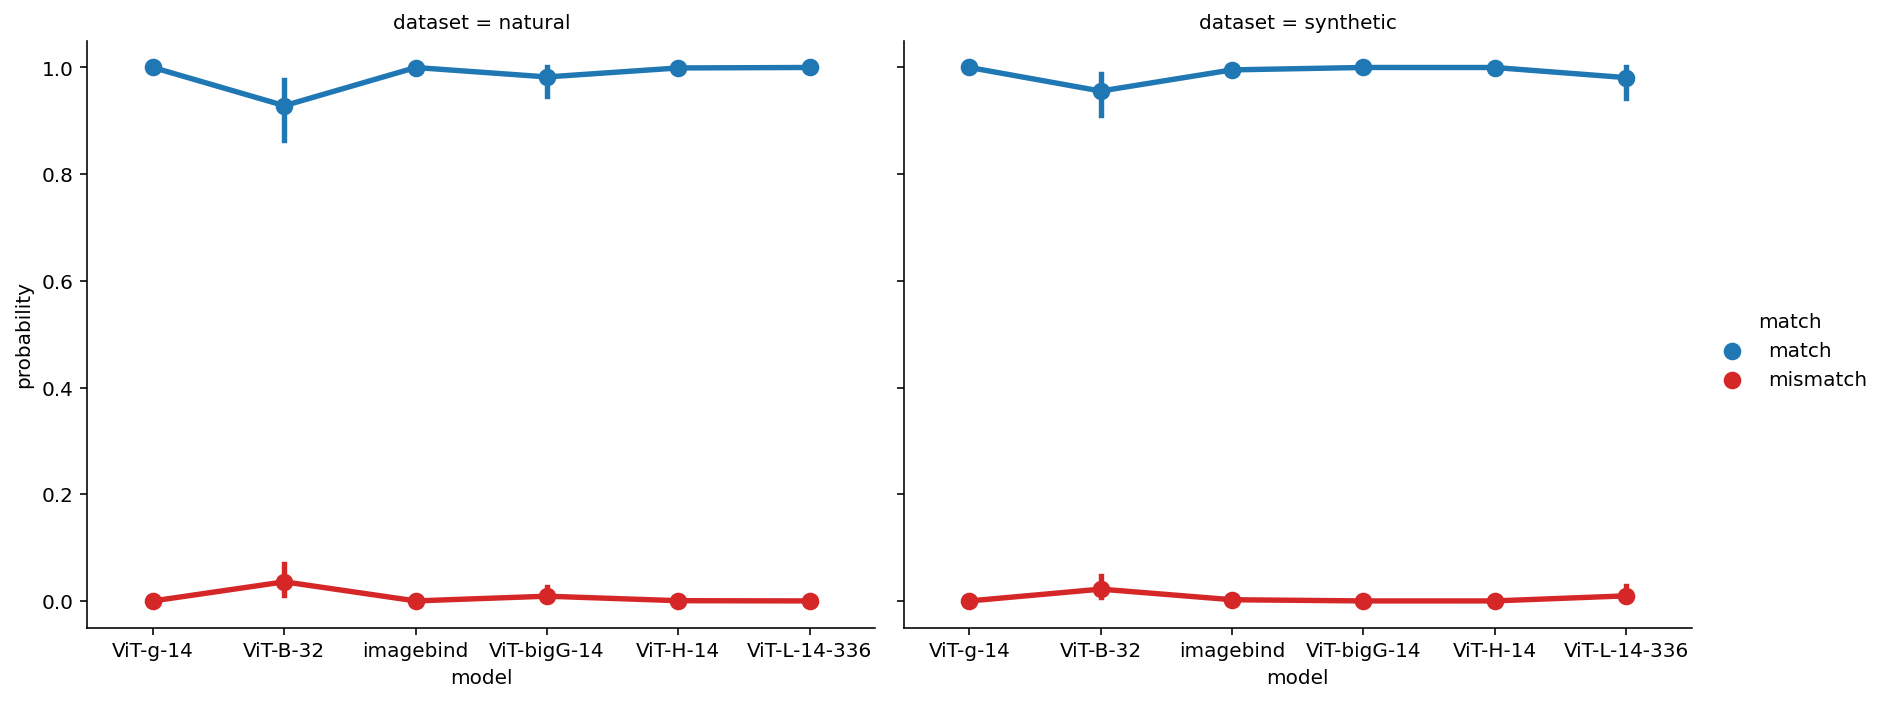

In [11]:
sns.catplot(data = df_concat,
            x = "model",
            y = "probability",
            hue = "match",
            col = "dataset",
            kind = "point",
            height= 5,
            aspect=1.2,
            palette= ['C0','C3'])

In [12]:
md = smf.mixedlm("probability ~ model * match", df_concat, groups=df_concat["dataset"])
mdf = md.fit()
print(mdf.summary())

                       Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          probability
No. Observations:          1944             Method:                      REML       
No. Groups:                2                Scale:                       0.0058     
Min. group size:           972              Log-Likelihood:              2204.6069  
Max. group size:           972              Converged:                   Yes        
Mean group size:           972.0                                                    
------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    z     P>|z| [0.025 0.975]
------------------------------------------------------------------------------------
Intercept                                0.942    0.007  128.469 0.000  0.928  0.956
model[T.ViT-H-14]                        0.057    0.010    5.546 0.000  0.037  0.078
mode

/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/aliceli/opt/anaconda3/envs/my_env/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# !install.packages('IRkernel')
# !IRkernel::installspec(user = FALSE)

In [ ]:
# TODO: Try in R

# %load_ext rpy2.ipython

# %%R
# install.packages("tidyverse")
# install.packages("lme4")